## Required lib and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

## Importing Data files

In [2]:
baner = pd.read_excel('data_source/Baner_cleaned.xlsx')
bavdhan = pd.read_excel('data_source/Bavdhan_cleaned.xlsx')
hinjewadi = pd.read_excel('data_source/Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('data_source/Wakad_cleaned.xlsx')

## Handling Data Files

In [3]:
baner['locality'] = 'Baner'
bavdhan['locality'] = 'Bavdhan'
hinjewadi['locality'] = 'Hinjewadi'
wakad['locality'] = 'Wakad'

In [4]:
baner_copy = baner.copy()
baner_copy =baner_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

bavdhan_copy = bavdhan.copy()
bavdhan_copy =bavdhan_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

hinjewadi_copy = hinjewadi.copy()
hinjewadi_copy =hinjewadi_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

wakad_copy = wakad.copy()
wakad_copy =wakad_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

### Cleaning the delilvery reviews column

In [5]:
baner_copy.delivery_reviews=baner_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
bavdhan_copy.delivery_reviews=bavdhan_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
hinjewadi_copy.delivery_reviews=hinjewadi_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
wakad_copy.delivery_reviews=wakad_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')

### Replacing value of K with 1000

In [6]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    return x
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(value_to_float)
bavdhan_copy['delivery_reviews'] = bavdhan_copy['delivery_reviews'].apply(value_to_float)
hinjewadi_copy['delivery_reviews'] = hinjewadi_copy['delivery_reviews'].apply(value_to_float)
wakad_copy['delivery_reviews'] = wakad_copy['delivery_reviews'].apply(value_to_float)

### HANDLING BANER DATA SET

### Dropping NAN values

In [7]:
baner_ratings = baner_copy.dropna(subset=['ratings','delivery_reviews'])
baner_ratings = baner_ratings[baner_ratings.delivery_reviews != '']

bavdhan_ratings = bavdhan_copy.dropna(subset=['ratings','delivery_reviews'])
bavdhan_ratings = bavdhan_ratings[bavdhan_ratings.delivery_reviews != '']

hinjewadi_ratings = hinjewadi_copy.dropna(subset=['ratings','delivery_reviews'])
hinjewadi_ratings = hinjewadi_ratings[hinjewadi_ratings.delivery_reviews != '']

wakad_ratings = wakad_copy.dropna(subset=['ratings','delivery_reviews'])
wakad_ratings = wakad_ratings[wakad_ratings.delivery_reviews != '']

### Converting the Values to Integers

In [8]:
def clean(x):
    try:
        return float(x)
    except:
        return np.NaN
baner_ratings['delivery_reviews']  = baner_ratings['delivery_reviews'].apply(clean)
bavdhan_ratings['delivery_reviews']  = bavdhan_ratings['delivery_reviews'].apply(clean)
hinjewadi_ratings['delivery_reviews']  = hinjewadi_ratings['delivery_reviews'].apply(clean)
wakad_ratings['delivery_reviews']  = wakad_ratings['delivery_reviews'].apply(clean)

## Just to create excel files of resta. having higgest delivery reviews

In [9]:
#baner_ratings.sort_values(by=['delivery_reviews'], ascending=False, inplace=True)
#baner_ratings.reset_index(inplace = True, drop = True)
#bn = baner_ratings.head(20)
#bn.to_excel(r'Baner_top_rest.xlsx', index = False)
#print('\nCSV String Values:\n', bn_data)  

In [10]:
#bavdhan_ratings.sort_values(by=['delivery_reviews'], ascending=False, inplace=True)
#bavdhan_ratings.reset_index(inplace = True, drop = True)
#bn = bavdhan_ratings.head(20)
#bn.to_excel(r'Bavdhan_top_rest.xlsx', index = False)
#print('\nCSV String Values:\n', bn_data)  

In [11]:
#hinjewadi_ratings.sort_values(by=['delivery_reviews'], ascending=False, inplace=True)
#hinjewadi_ratings.reset_index(inplace = True, drop = True)
#bn = hinjewadi_ratings.head(20)
#bn.to_excel(r'Hinjewadi_top_rest.xlsx', index = False)
#print('\nCSV String Values:\n', bn_data)  

In [12]:
#wakad_ratings.sort_values(by=['delivery_reviews'], ascending=False, inplace=True)
#wakad_ratings.reset_index(inplace = True, drop = True)
#bn = wakad_ratings.head(20)
#bn.to_excel(r'Wakad_top_rest.xlsx', index = False)
#print('\nCSV String Values:\n', bn_data)  

### Changing values of Delivery reviews 

In [13]:
baner_ratings['delivery_reviews'].where(~(baner_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)
bavdhan_ratings['delivery_reviews'].where(~(bavdhan_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)
hinjewadi_ratings['delivery_reviews'].where(~(hinjewadi_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)
wakad_ratings['delivery_reviews'].where(~(wakad_ratings['delivery_reviews']>10000.0), other=10000, inplace=True)

### Converting delivery values to range of 1-5

In [14]:
deliv = []
for x in (baner_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
baner_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
baner_ratings['deliv']= df['deliv']

In [15]:
deliv = []
for x in (bavdhan_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
bavdhan_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
bavdhan_ratings['deliv']= df['deliv']

In [16]:
deliv = []
for x in (hinjewadi_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
hinjewadi_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
hinjewadi_ratings['deliv']= df['deliv']

In [17]:
deliv = []
for x in (wakad_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (10000.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
wakad_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
wakad_ratings['deliv']= df['deliv']

## Sorting values

In [18]:
baner_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
baner_ratings.reset_index(inplace = True, drop = True)

bavdhan_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
bavdhan_ratings.reset_index(inplace = True, drop = True)

hinjewadi_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
hinjewadi_ratings.reset_index(inplace = True, drop = True)

wakad_ratings.sort_values(by=['ratings', 'deliv'], ascending=False, inplace=True)
wakad_ratings.reset_index(inplace = True, drop = True)

### Making different sets of data

In [19]:
above_four =  baner_ratings.loc[(baner_ratings.ratings > 4.0)]
above_four.reset_index(inplace = True, drop = True)
above_three = baner_ratings.loc[(baner_ratings.ratings >3.0) & (baner_ratings.ratings < 4.0)]
above_three.reset_index(inplace = True, drop = True)
above_two = baner_ratings.loc[(baner_ratings.ratings >2.0) & (baner_ratings.ratings < 3.0)]
above_two.reset_index(inplace = True, drop = True)
above_one = baner_ratings.loc[(baner_ratings.ratings >1.0) & (baner_ratings.ratings < 2.0)]
above_one.reset_index(inplace = True, drop = True)

In [20]:
above_four

,Name,locality,ratings,off,delivery_reviews,cuisine,deliv
0,LKD | La Kheer Deli,Baner,4.5,₹50 OFF,2002.0,Desserts,1.00
1,Natural Ice Cream,Baner,4.5,₹50 OFF,1621.0,"Ice Cream, Desserts",0.81
2,Squeezo Foods,Baner,4.5,₹50 OFF,1537.0,"Salad, Healthy Food, Sandwich, American, North...",0.77
3,Baskin Robbins,Baner,4.5,50% OFF,601.0,"Ice Cream, Desserts, Beverages",0.30
4,LKD | La Kheer Deli,Baner,4.5,50% OFF,211.0,Desserts,0.11
...,...,...,...,...,...,...,...
189,Haka,Baner,4.1,50% OFF,93.0,"Chinese, Momos",0.05
190,Taste Chettinad - Veg,Baner,4.1,₹50 OFF,79.0,"Chettinad, South Indian",0.04
191,Namaste Khichdi,Baner,4.1,NaN,59.0,"Healthy Food, North Indian",0.03
192,Soy De Asian,Baner,4.1,NaN,60.0,Chinese,0.03


#### --------------------------------------------------------------------------------------------------------------------------------------------------

## HANDLING BAVDHAN DATA SET

In [21]:
bavdhan_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              834 non-null    object 
 1   locality          834 non-null    object 
 2   ratings           617 non-null    float64
 3   off               701 non-null    object 
 4   delivery_reviews  751 non-null    object 
 5   cuisine           834 non-null    object 
dtypes: float64(1), object(5)
memory usage: 39.2+ KB


## HANDLING HINJEWADI DATA SET

In [22]:
hinjewadi_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              960 non-null    object 
 1   locality          960 non-null    object 
 2   ratings           710 non-null    float64
 3   off               582 non-null    object 
 4   delivery_reviews  867 non-null    object 
 5   cuisine           960 non-null    object 
dtypes: float64(1), object(5)
memory usage: 45.1+ KB


## HANDLING WAKAD DATA SET

In [23]:
wakad_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1118 non-null   object 
 1   locality          1118 non-null   object 
 2   ratings           781 non-null    float64
 3   off               810 non-null    object 
 4   delivery_reviews  970 non-null    object 
 5   cuisine           0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 52.5+ KB


# -------------------------------------------------------------------------------------

## Scatter plotting one by one

/home/perman/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/perman/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0, flags=flags)


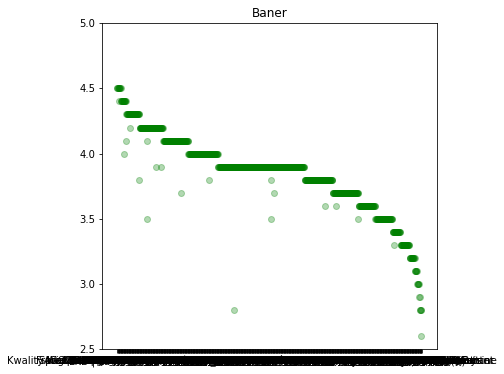

In [24]:
plt.figure(figsize=(6,6))
x = baner_ratings['Name']
y1 = baner_ratings['ratings']

axes = plt.gca()
axes.set_ylim([2.5,5.0])
plt.title("Baner")
plt.scatter(x, y1, color='g',alpha=0.3)
plt.show()

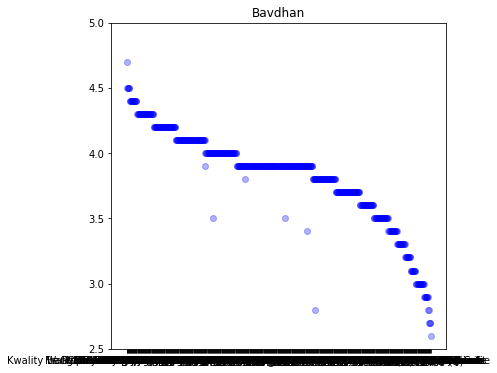

In [25]:
plt.figure(figsize=(6,6))
x = bavdhan_ratings['Name']
y1 = bavdhan_ratings['ratings']
plt.title("Bavdhan")
axes = plt.gca()
axes.set_ylim([2.5,5.0])
plt.scatter(x, y1, color='b',alpha=0.3)
plt.show()

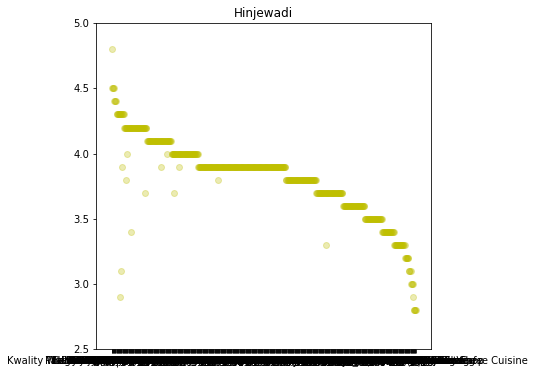

In [26]:
plt.figure(figsize=(6,6))
x = hinjewadi_ratings['Name']
y1 = hinjewadi_ratings['ratings']
plt.title("Hinjewadi")
axes = plt.gca()
axes.set_ylim([2.5,5.0])
plt.scatter(x, y1, color='y',alpha=0.3)
plt.show()

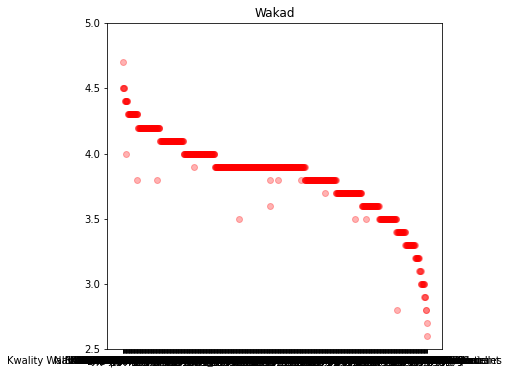

In [27]:
plt.figure(figsize=(6,6))
x = wakad_ratings['Name']
y1 = wakad_ratings['ratings']
plt.title("Wakad")
axes = plt.gca()
axes.set_ylim([2.5,5.0])
plt.scatter(x, y1, color='r',alpha=0.3)
plt.show()

## Ratings & Delivery reviews VS Name

<Figure size 720x720 with 0 Axes>

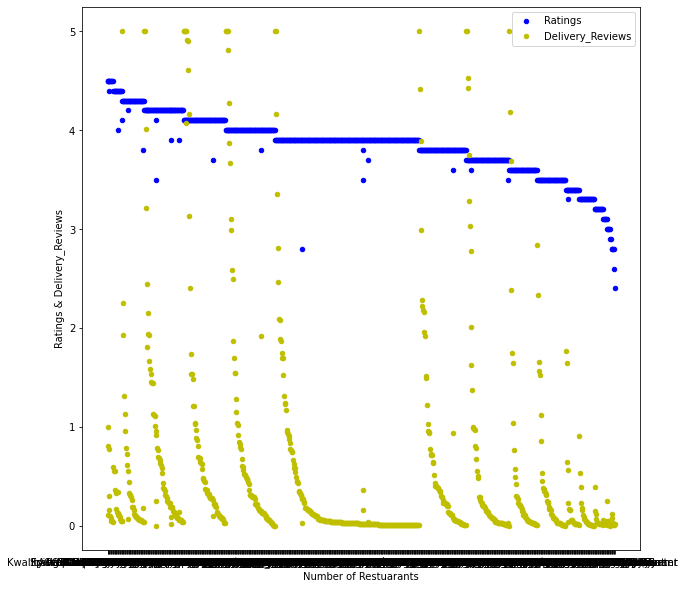

In [28]:
plt.figure(figsize=(10,10))
ax = baner_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
baner_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")
plt.show()

<Figure size 720x720 with 0 Axes>

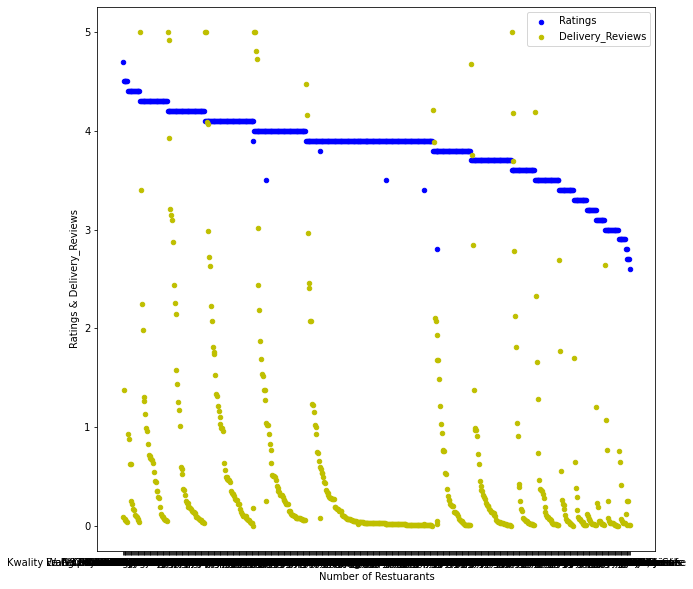

In [29]:
plt.figure(figsize=(10,10))
ax = bavdhan_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
bavdhan_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")

plt.show()

<Figure size 720x720 with 0 Axes>

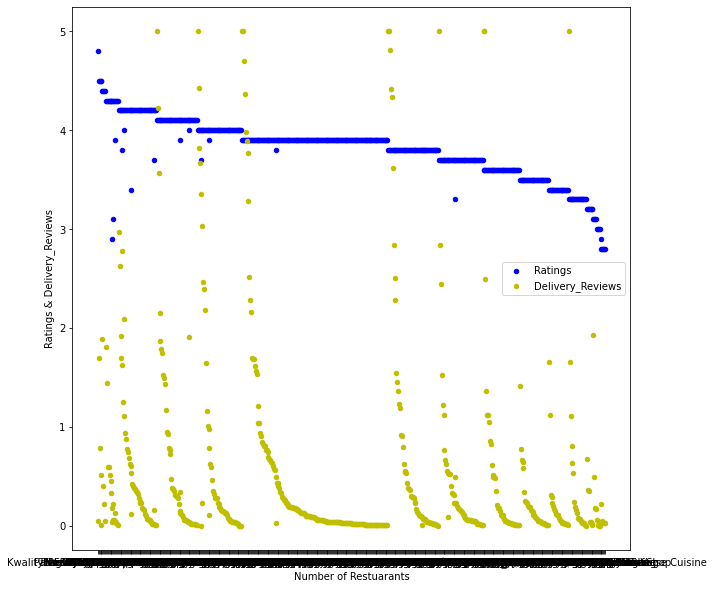

In [30]:
plt.figure(figsize=(10,10))
ax = hinjewadi_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
hinjewadi_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")

plt.show()

<Figure size 720x720 with 0 Axes>

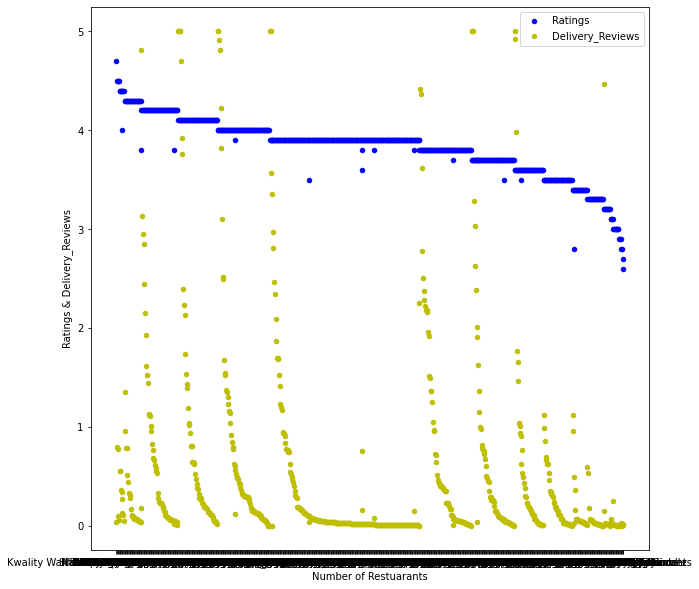

In [31]:
plt.figure(figsize=(10,10))
ax = wakad_ratings.plot(kind="scatter", x='Name', y='ratings', color="b",label="Ratings",figsize=(10, 10))
wakad_ratings.plot( kind="scatter",x='Name', y='deliv', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Delivery_Reviews")

plt.show()

### Combining the filterd data all together

In [32]:
bob = pd.DataFrame()

In [33]:
bob = bob.assign(index = baner_ratings.index,baner=baner_ratings['ratings'],bavdhan=bavdhan_ratings['ratings'],
                                    hinjewadi=hinjewadi_ratings['ratings'],wakad=wakad_ratings['ratings'])

<Figure size 720x720 with 0 Axes>

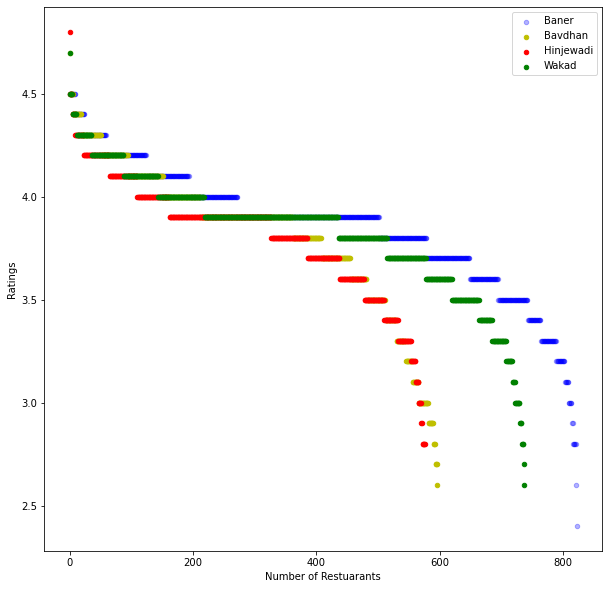

In [34]:
plt.figure(figsize=(10,10))
ax = bob.plot(kind="scatter", x='index', y='baner', color="b",label="Baner",figsize=(10, 10),alpha=0.3)
bob.plot( kind="scatter",x='index', y='bavdhan', color="y",label="Bavdhan", ax=ax)
bob.plot(kind="scatter", x='index', y='hinjewadi', color="r",label="Hinjewadi", ax=ax)
bob.plot(kind="scatter", x='index', y='wakad', color="g",label="Wakad",  ax=ax)

ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings")

plt.show()

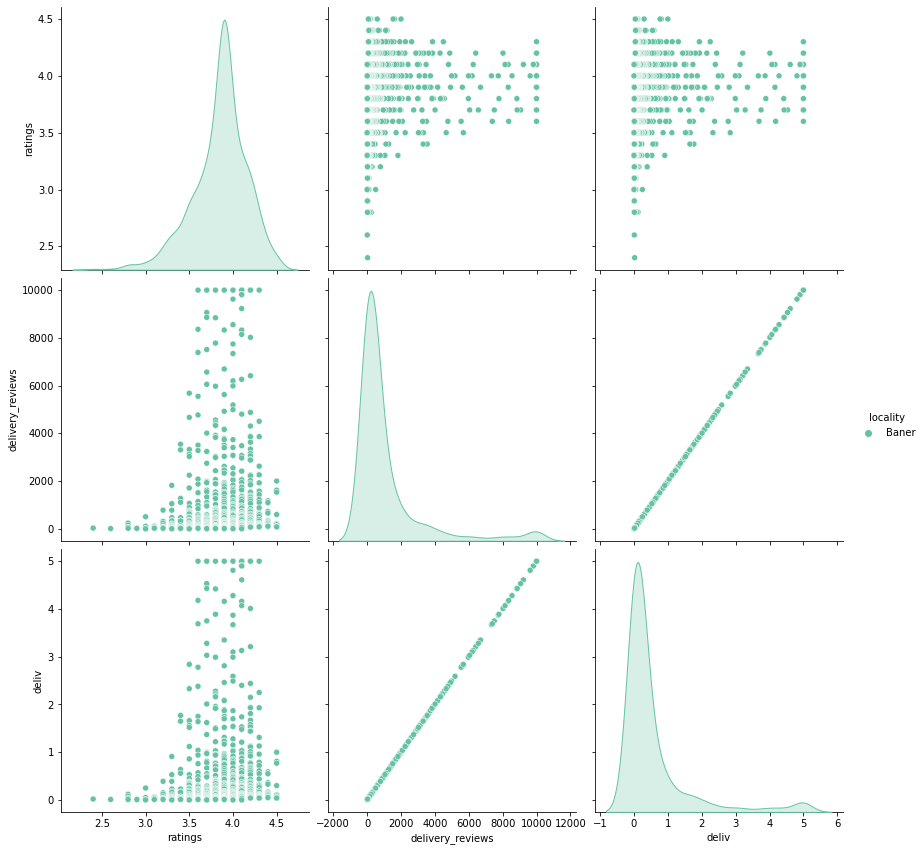

In [35]:
sns.pairplot(baner_ratings, hue = "locality", palette = "Set2",height = 4)

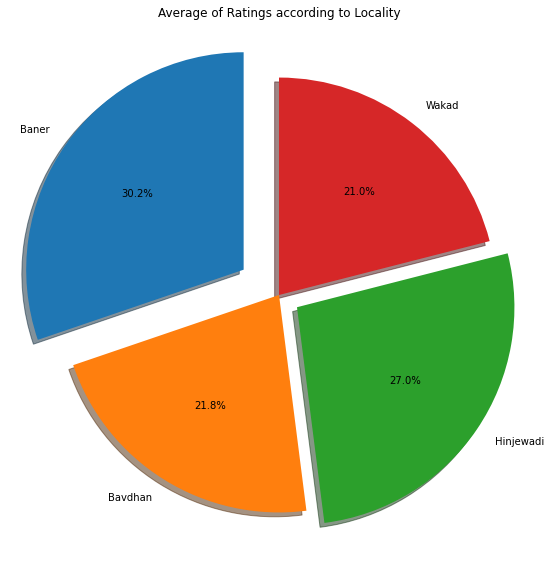

In [36]:
sizes= [bob['baner'].sum(),bob['bavdhan'].sum(),bob['wakad'].sum(),bob['hinjewadi'].sum()]
labels = ['Baner', 'Bavdhan', 'Hinjewadi', 'Wakad']
explode = (0.2, 0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.title("Average of Ratings according to Locality")
ax1.pie(sizes, explode=explode, labels=labels,shadow=True,autopct='%1.1f%%' ,startangle=90,)
plt.rcParams['font.size'] = 20
plt.show()

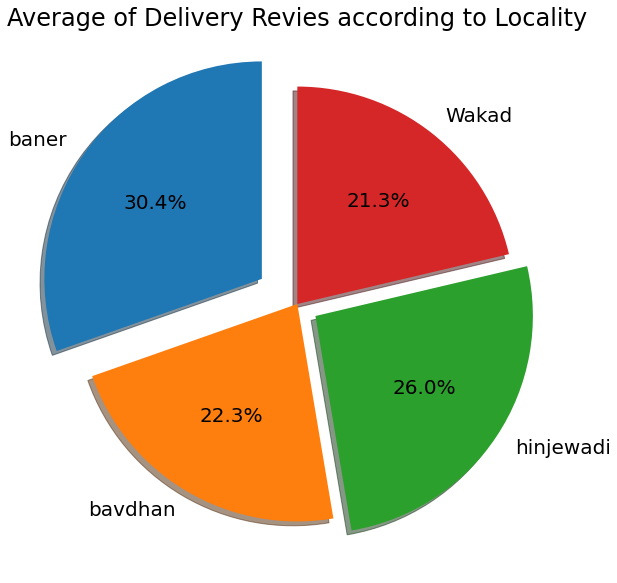

In [37]:
sizes= [baner_ratings['deliv'].sum(),bavdhan_ratings['deliv'].sum(),wakad_ratings['deliv'].sum(),hinjewadi_ratings['deliv'].sum()]
labels = ['baner', 'bavdhan', 'hinjewadi', 'Wakad']
explode = (0.2, 0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.title("Average of Delivery Revies according to Locality")
ax1.pie(sizes, explode=explode, labels=labels,shadow=True,autopct='%1.1f%%' ,startangle=90,)
plt.rcParams['font.size'] = 20
plt.show()

In [38]:
shawn = pd.DataFrame()

In [39]:
shawn = pd.concat([baner_ratings,bavdhan_ratings,hinjewadi_ratings,wakad_ratings])

In [40]:
def clean(x):
    try:
        return str(x)
    except:
        return np.NaNq
shawn['cuisine']  = shawn['cuisine'].apply(clean)

In [41]:
df=shawn.groupby(['locality'])

locality
Baner        AxesSubplot(0.125,0.125;0.775x0.755)
Bavdhan      AxesSubplot(0.125,0.125;0.775x0.755)
Hinjewadi    AxesSubplot(0.125,0.125;0.775x0.755)
Wakad        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

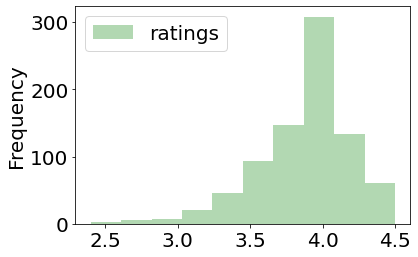

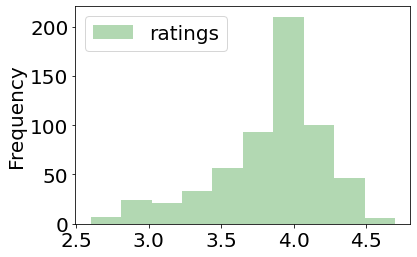

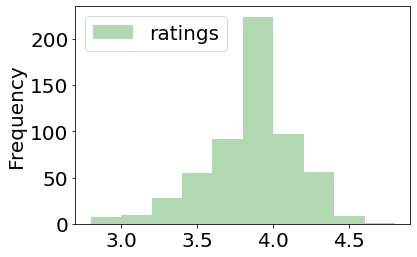

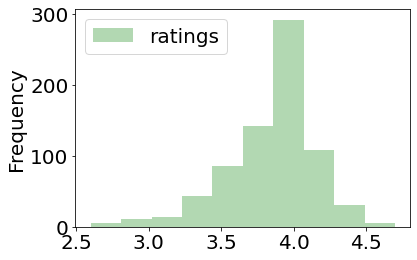

In [42]:
df.plot(x= 'Name', y = 'ratings', color = 'g' ,kind='hist',alpha = 0.3) # other method

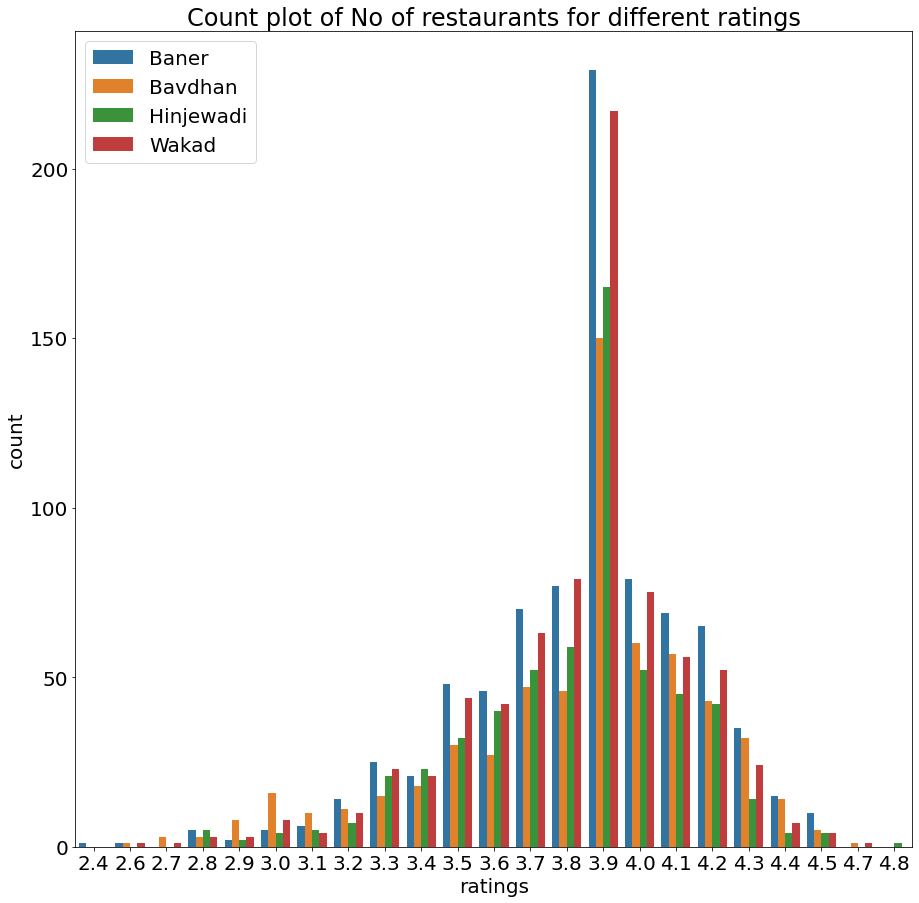

In [43]:
fig = plt.gcf()
sns.countplot(data = shawn, hue = 'locality', x = 'ratings').legend(loc = 2)
plt.title('Count plot of No of restaurants for different ratings')
fig.set_size_inches(15, 15)
plt.show()

<Figure size 432x288 with 0 Axes>

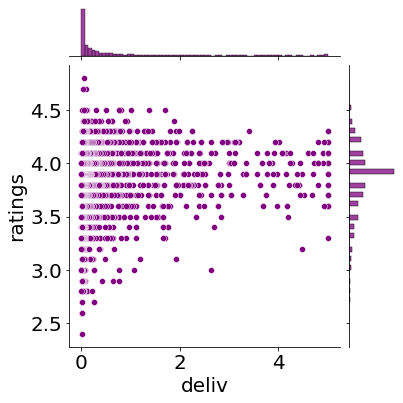

<Figure size 1080x1080 with 0 Axes>

In [44]:
fig = plt.gcf()

sns.jointplot(x = "deliv", y = "ratings",data = shawn ,color= "purple")
plt.figure(figsize=(15, 15))
plt.show()

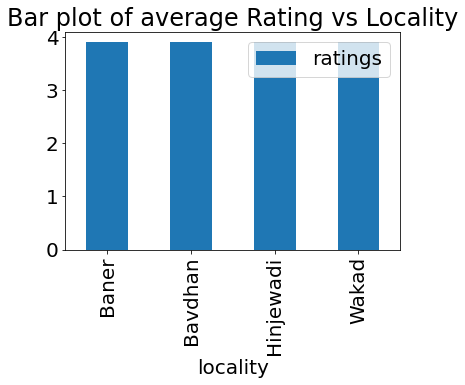

In [45]:
shawn[['ratings', 'locality']].groupby(['locality']).median().sort_values("ratings", ascending = True).plot.bar()
plt.title('Bar plot of average Rating vs Locality')

plt.show()

<Figure size 720x720 with 0 Axes>

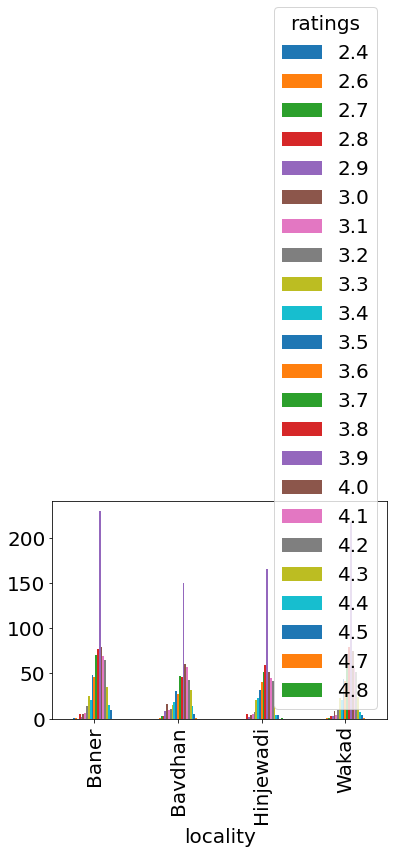

In [46]:
fig = plt.gcf()
groups = shawn.groupby(['locality','ratings']).size().unstack(fill_value=0)
groups.plot.bar()
fig.set_size_inches(10,10)
plt.show()

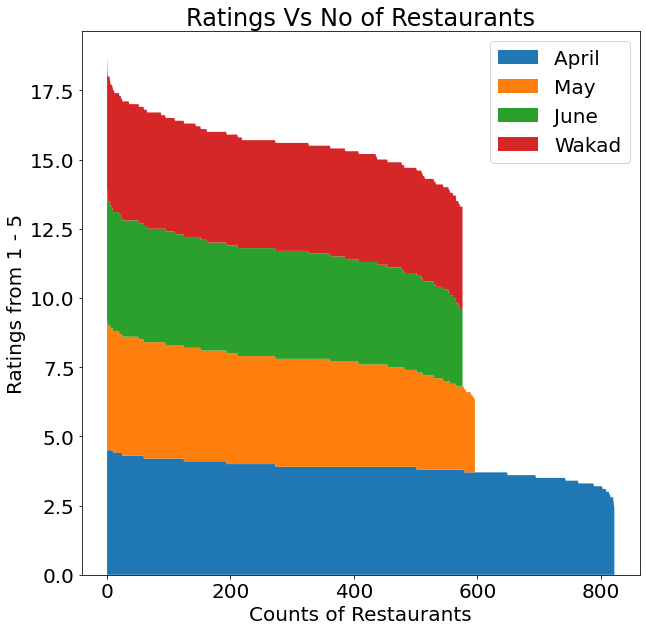

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = bob['index']
Baner = bob['baner']
Bavdhan = bob['bavdhan']
Hinjewadi = bob['hinjewadi']
Wakad = bob['wakad']
labels = ["April ", "May", "June","Wakad"]

fig, ax = plt.subplots(figsize=(10,10))
ax.stackplot(x, Baner, Bavdhan, Hinjewadi,Wakad, labels=labels)
ax.legend(loc=1)


plt.xlabel('Counts of Restaurants')
plt.ylabel('Ratings from 1 - 5')
plt.title('Ratings Vs No of Restaurants')

plt.show();

In [48]:
cuisines=[j.lower().strip() for i in shawn.cuisine for j in i.split(',')]

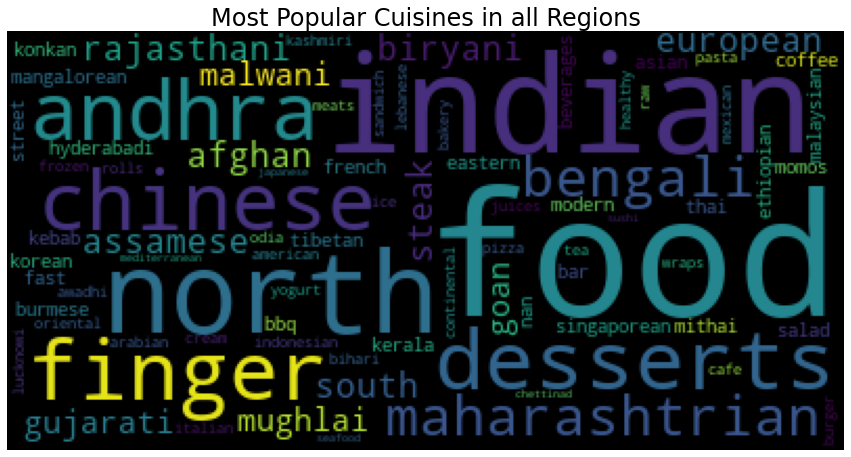

In [49]:
plt.figure( figsize=(15,10) )
cuisines_set=set(cuisines)
cuisines_wc=', '.join(cuisines_set)
wc=WordCloud(stopwords=STOPWORDS,max_words=len(cuisines_wc))
wc.generate(cuisines_wc)
plt.axis("off")
plt.imshow(wc)
plt.title('Most Popular Cuisines in all Regions')
plt.show()

## Ratings null and Not null count

### BANER

In [50]:
print('Null values in Baner data set:', baner_copy['ratings'].isna().sum())

Null values in Baner data set: 286


In [51]:
baner_copy['ratings'].notnull().sum()

851

### BAVDHAN

In [52]:
bavdhan_copy['ratings'].isna().sum()

217

In [53]:
bavdhan_copy['ratings'].notnull().sum()

617

### HINJEWADI

In [54]:
hinjewadi_copy['ratings'].isna().sum()

250

In [55]:
hinjewadi_copy['ratings'].notnull().sum()

710

### WAKAD

In [56]:
wakad_copy['ratings'].isna().sum()

337

In [57]:
wakad_copy['ratings'].notnull().sum()

781

In [58]:
baner_ratings.isna().sum()

Name                 0
locality             0
ratings              0
off                 57
delivery_reviews     0
cuisine              0
deliv                0
dtype: int64

In [59]:
baner_copy.isnull().sum()

Name                  0
locality              0
ratings             286
off                 169
delivery_reviews    127
cuisine               0
dtype: int64

In [60]:
shawn['delivery_reviews'].max()

10000.0